# Cross-Lingual Similarity and Semantic Search Engine with Multilingual Universal Sentence Encoder


In [1]:
import bokeh
import bokeh.models
import bokeh.plotting
import numpy as np
import os
import pandas as pd
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from tensorflow_text import SentencepieceTokenizer
import sklearn.metrics.pairwise

from simpleneighbors import SimpleNeighbors
from tqdm import tqdm
from tqdm import trange
import subprocess

In [2]:
#@title Setup common imports and functions


def visualize_similarity(embeddings_1, embeddings_2, labels_1, labels_2,
                         plot_title,
                         plot_width=1200, plot_height=600,
                         xaxis_font_size='12pt', yaxis_font_size='12pt'):

  assert len(embeddings_1) == len(labels_1)
  assert len(embeddings_2) == len(labels_2)

  # arccos based text similarity (Yang et al. 2019; Cer et al. 2019)
  sim = 1 - np.arccos(
      sklearn.metrics.pairwise.cosine_similarity(embeddings_1,
                                                 embeddings_2))/np.pi

  embeddings_1_col, embeddings_2_col, sim_col = [], [], []
  for i in range(len(embeddings_1)):
    for j in range(len(embeddings_2)):
      embeddings_1_col.append(labels_1[i])
      embeddings_2_col.append(labels_2[j])
      sim_col.append(sim[i][j])
  df = pd.DataFrame(zip(embeddings_1_col, embeddings_2_col, sim_col),
                    columns=['embeddings_1', 'embeddings_2', 'sim'])

  mapper = bokeh.models.LinearColorMapper(
      palette=[*reversed(bokeh.palettes.YlOrRd[9])], low=df.sim.min(),
      high=df.sim.max())

  p = bokeh.plotting.figure(title=plot_title, x_range=labels_1,
                            x_axis_location="above",
                            y_range=[*reversed(labels_2)],
                            plot_width=plot_width, plot_height=plot_height,
                            tools="save",toolbar_location='below', tooltips=[
                                ('pair', '@embeddings_1 ||| @embeddings_2'),
                                ('sim', '@sim')])
  p.rect(x="embeddings_1", y="embeddings_2", width=1, height=1, source=df,
         fill_color={'field': 'sim', 'transform': mapper}, line_color=None)

  p.title.text_font_size = '12pt'
  p.axis.axis_line_color = None
  p.axis.major_tick_line_color = None
  p.axis.major_label_standoff = 16
  p.xaxis.major_label_text_font_size = xaxis_font_size
  p.xaxis.major_label_orientation = 0.25 * np.pi
  p.yaxis.major_label_text_font_size = yaxis_font_size
  p.min_border_right = 300

  bokeh.io.output_notebook()
  bokeh.io.show(p)


In [29]:
# The 16-language multilingual module is the default but feel free
# to pick others from the list and compare the results.
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' #@param ['https://tfhub.dev/google/universal-sentence-encoder-multilingual/3', 'https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3']

model = hub.load(module_url)

def embed_text(input):
  return model(input)

In [31]:
final_df = pd.read_pickle('final_filter_dataset_social2.pkl')

In [75]:
final_df = pd.read_pickle('final_filter_dataset_social_text.pkl')

In [4]:
final_df = pd.read_pickle('final_filter_dataset_social_image.pkl')

In [4]:
final_df = pd.read_pickle('final_filter_dataset_social_v2.pkl')

In [9]:
final_df = pd.read_pickle('final_filter_dataset_social_image_v2.pkl')

In [4]:
final_df = pd.read_pickle('final_filter_dataset_social_text_v2.pkl')

In [3]:
final_df = pd.read_pickle('filtered_dataset_v2_views.pkl')

In [16]:
final_df.  read_pickle('filtered_dataset_v2_views_dropna.pkl')

In [5]:
final_df.shape

(136288, 29)

In [6]:
final_df = final_df.dropna(subset=['type_post', 'pop_class', 'spell_text_with_re', 'description_image'])

In [17]:
final_df.shape

(32591, 29)

In [10]:
final_df.head()

,id_community,id_post,date_posted,count_likes,count_views,count_comments,count_reposts,text_post,image_url,post_url,...,sentiment_text_ocr_image_2,level_sentiment_ocr_1,level_sentiment_ocr_2,description_image,spell_text_with_re,perc_unk_words,perc_unk_words_re,pop_class,likes_per_views,id_community_str
1,-95355317,2106041,2022-05-12 12:03:02,6,6342.0,4,9,NaN,https://sun1-18.userapi.com/s/v1/ig2/gwRD8wNJH...,https://vk.com/wall-95355317_2106041,...,positive,0.986787,0.016925,the evolution of korean beauty in 2018 and 2020,когда вс жизнь мечтала стать парнем,0.666667,0.000000,NaN,0.000946,-95355317
3,-95355317,2106029,2022-05-12 10:03:00,9,8934.0,7,5,NaN,https://sun1-55.userapi.com/s/v1/ig2/iyfPNRSKA...,https://vk.com/wall-95355317_2106029,...,negative,0.976321,0.275140,a small console table is made out of a metal,не могу понять стоит или лежит,0.000000,0.000000,NaN,0.001007,-95355317
5,-95355317,2105981,2022-05-11 19:10:00,378,23118.0,2,161,NaN,https://sun1-96.userapi.com/s/v1/ig2/0Etc7GMf3...,https://vk.com/wall-95355317_2105981,...,skip,0.362979,0.239359,the face of a monkey on a screenshot of a cell...,влад крутится ли воздух внутри колеса вчера в ...,0.354167,0.125000,NaN,0.016350,-95355317
6,-95355317,2105977,2022-05-11 17:10:00,32,5581.0,0,42,NaN,https://sun1-83.userapi.com/s/v1/ig2/YQU9ENzXN...,https://vk.com/wall-95355317_2105977,...,skip,0.992889,0.020974,a screenshot of a cell phone message with a cake,это мы когда отмечаете один день без ссор ещё...,0.272727,0.058824,NaN,0.005733,-95355317
8,-95355317,2105968,2022-05-11 12:10:00,19,5397.0,0,23,NaN,https://sun1-54.userapi.com/s/v1/ig2/2mVk4bj_j...,https://vk.com/wall-95355317_2105968,...,positive,0.737168,0.445540,a woman is making a bed with a clock,сегоднялягулоракьше интересно что такого случ...,0.250000,0.083333,NaN,0.003520,-95355317


In [ ]:
final_df = pd.read_pickle('final_filter_dataset_social_image_v3.pkl')

In [21]:
final_df.head(5)

,id_community,id_post,date_posted,count_likes,count_views,count_comments,count_reposts,text_post,image_url,post_url,...,level_sentiment_post_2,sentiment_text_ocr_image_1,sentiment_text_ocr_image_2,level_sentiment_ocr_1,level_sentiment_ocr_2,description_image,spell_text_with_re,perc_unk_words,perc_unk_words_re,pop_class
3,-95355317,2106029,2022-05-12 10:03:00,9,8934.0,7,5,NaN,https://sun1-55.userapi.com/s/v1/ig2/iyfPNRSKA...,https://vk.com/wall-95355317_2106029,...,0.106701,neutral,negative,0.976321,0.275140,a small console table is made out of a metal,не могу понять стоит или лежит,0.000000,0.000000,0.0
5,-95355317,2105981,2022-05-11 19:10:00,378,23118.0,2,161,NaN,https://sun1-96.userapi.com/s/v1/ig2/0Etc7GMf3...,https://vk.com/wall-95355317_2105981,...,0.106701,neutral,skip,0.362979,0.239359,the face of a monkey on a screenshot of a cell...,влад крутится ли воздух внутри колеса вчера в ...,0.354167,0.125000,1.0
8,-95355317,2105968,2022-05-11 12:10:00,19,5397.0,0,23,NaN,https://sun1-54.userapi.com/s/v1/ig2/2mVk4bj_j...,https://vk.com/wall-95355317_2105968,...,0.106701,neutral,positive,0.737168,0.445540,a woman is making a bed with a clock,сегоднялягулоракьше интересно что такого случ...,0.250000,0.083333,0.0
12,-95355317,2105872,2022-05-10 10:02:01,249,17896.0,2,123,NaN,https://sun1-89.userapi.com/s/v1/ig2/nvBHvrDEK...,https://vk.com/wall-95355317_2105872,...,0.106701,neutral,positive,0.327678,0.239359,a man is holding a cell phone in a car,быстро руки вверх с аи воктебяцвлувгговоритч...,0.533333,0.272727,1.0
14,-95355317,2105727,2022-05-08 15:07:00,125,21487.0,4,27,NaN,https://sun1-26.userapi.com/s/v1/ig2/txL_3VCSV...,https://vk.com/wall-95355317_2105727,...,0.106701,neutral,skip,0.887215,0.112805,a picture of a woman shaving a man,в казахстане есть барбер к которой мужики запи...,0.388889,0.200000,1.0


In [5]:
final_df.shape

(30989, 27)

In [3]:
udf = pd.read_pickle('dataset_social_finish_1.pkl')

In [3]:
udf = pd.read_pickle('dataset_social_final_finish.pkl')

In [4]:
udf.columns

Index(['id_community', 'id_post', 'date_posted', 'count_likes', 'count_views',
       'count_comments', 'count_reposts', 'text_post', 'image_url', 'post_url',
       'type_post', 'text_ocr_image', 'size_text_ocr', 'spell_text_ocr_image',
       'sentiment_text_post_1', 'sentiment_text_post_2',
       'level_sentiment_post_1', 'level_sentiment_post_2',
       'sentiment_text_ocr_image_1', 'sentiment_text_ocr_image_2',
       'level_sentiment_ocr_1', 'level_sentiment_ocr_2', 'description_image',
       'spell_text_with_re', 'year', 'date', 'dayofweek', 'weekend',
       'log_count_likes', 'log_count_views', 'log_count_comments',
       'log_count_reposts'],
      dtype='object')

In [31]:
df_test[df_test['description_image'].str.len() > 0]

,id_community,id_post,date_posted,count_likes,count_views,count_comments,count_reposts,text_post,image_url,post_url,...,level_sentiment_post_1,level_sentiment_post_2,sentiment_text_ocr_image_1,sentiment_text_ocr_image_2,level_sentiment_ocr_1,level_sentiment_ocr_2,description_image,spell_text_with_re,perc_unk_words,perc_unk_words_re
145327,-25679656,1381060,2022-05-20 21:45:00,650,27621.0,38,258,,https://sun1-29.userapi.com/s/v1/ig2/hQWOLWIWe...,https://vk.com/wall-25679656_1381060,...,NaN,NaN,neutral,negative,0.637041,0.132974,an image of a painting of a woman sitting at a...,вообще надо что-то делать для восстановления к...,0.142857,0.074074
145329,-25679656,1380815,2022-05-20 17:45:00,5131,156188.0,148,2719,Лучшее фото с марафона которое я видела,https://sun1-99.userapi.com/s/v1/ig2/NcDKjIlrg...,https://vk.com/wall-25679656_1380815,...,0.831153,0.55448,,,NaN,NaN,a group of people running a race on a bridge,,NaN,NaN
145330,-25679656,1380689,2022-05-20 15:45:00,1955,74437.0,19,1193,,https://sun1-87.userapi.com/s/v1/ig2/tlgjKfpbH...,https://vk.com/wall-25679656_1380689,...,NaN,NaN,neutral,negative,0.531219,0.233716,a black and white photo of a girl with a flowe...,может тебе пора повзрослеть стать серьезной ...,0.285714,0.000000
145332,-25679656,1380414,2022-05-20 11:45:00,1163,62925.0,22,450,,https://sun1-83.userapi.com/s/v1/ig2/uwK-IhnnO...,https://vk.com/wall-25679656_1380414,...,NaN,NaN,positive,skip,0.196836,0.100889,a picture of a group of kids and an old man wi...,это хогвартс место где я буду относиться ко в...,0.294118,0.117647
145333,-25679656,1380248,2022-05-20 09:45:00,716,43814.0,11,290,,https://sun1-13.userapi.com/s/v1/ig2/mU4ht7jDO...,https://vk.com/wall-25679656_1380248,...,NaN,NaN,neutral,positive,0.793116,0.152042,a cat laying on a blanket with its mouth open,я ставлю будильник на будильник будит меня в я,0.416667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202325,-25679656,1295,2012-04-28 23:04:00,3580,NaN,0,808,,https://sun1-98.userapi.com/s/v1/if1/CEkLj76-9...,https://vk.com/wall-25679656_1295,...,NaN,NaN,negative,skip,0.476590,0.320831,a picture of a face on a yellow,ты сова иа и жаворонок судя по ритму жизни я з...,0.272727,0.000000
202326,-25679656,1294,2012-04-28 22:56:00,2975,NaN,0,615,,https://sun1-86.userapi.com/s/v1/if1/vTvuk_fC_...,https://vk.com/wall-25679656_1294,...,NaN,NaN,neutral,negative,0.173298,0.164526,a drawing of a woman with a bottle,и запомни золушка ровно в часов ночи волшебст...,0.200000,0.071429
202327,-25679656,1293,2012-04-28 22:54:00,3066,NaN,0,559,,https://sun1-15.userapi.com/s/v1/if1/mnS8dQkvt...,https://vk.com/wall-25679656_1293,...,NaN,NaN,skip,positive,0.173298,0.067557,a man and a woman standing next to a suitcase,я вас аюби бы дебби,0.600000,0.400000
202328,-25679656,1289,2012-04-28 22:53:00,2973,NaN,0,595,,https://sun1-99.userapi.com/s/v1/if1/mjTW_uMIv...,https://vk.com/wall-25679656_1289,...,NaN,NaN,skip,positive,0.334599,0.182436,a group of people sitting at a computer,пап а правда что от общения в чатах на форума...,0.466667,0.071429


In [5]:
s1 = udf[udf['description_image'].str.len() > 0].loc[:4000, 'description_image']
s2 = udf[udf['description_image'].str.len() > 0].loc[:4000, 'spell_text_with_re']
e1 = embed_text(s1)
e2 = embed_text(s2)

In [ ]:
# npz

In [6]:
def sim(e1, e2):
    return 1 - np.arccos(sklearn.metrics.pairwise.cosine_similarity(e1, e2))/np.pi

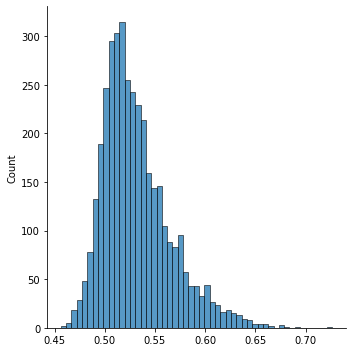

In [15]:
sns.displot(sim(e1, e2).diagonal())

/home/sergey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


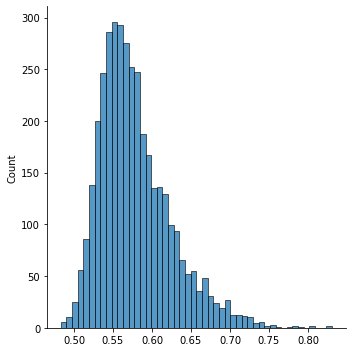

In [10]:
sns.displot(sim(e1[:-1], e1[1:]).diagonal())

/home/sergey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


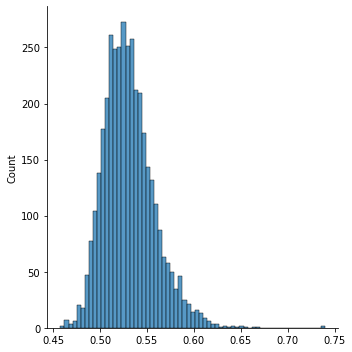

In [20]:
sns.displot(sim(e2[:-1], e2[1:]).diagonal())

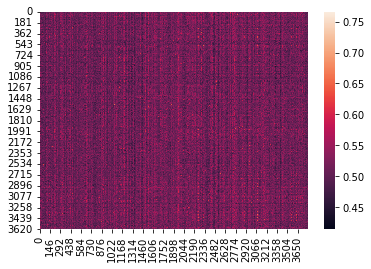

In [18]:
sns.heatmap(sim(e1, e2))

### Модель классификации популярности

In [9]:
import os, random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [1]:
check = ! ls /home/sergey/maga_diploma/models/popular/dataset/is_pop/*

In [2]:
check[1]

'/home/sergey/maga_diploma/models/popular/dataset/is_pop/4ch_-95355317_1912286.jpg'

In [10]:
base_dir = '/home/sergey/maga_diploma/models/popular/dataset'
pop_data_dir = os.path.join(base_dir, 'is_pop')
notpop_data_dir = os.path.join(base_dir, 'not_pop')


img_width, img_height = 224, 224

In [3]:
from tensorflow.keras.applications import ResNet50

img_width, img_height = 224, 224
conv_base = ResNet50(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

In [56]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, train_sample_count, valid_sample_count):
    train_features = np.zeros(shape=(train_sample_count, 7, 7, 2048))  # Must be equal to the output of the convolutional base
    train_labels = np.zeros(shape=(train_sample_count))
    
    valid_features = np.zeros(shape=(valid_sample_count, 7, 7, 2048))  # Must be equal to the output of the convolutional base
    valid_labels = np.zeros(shape=(valid_sample_count))
    
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary',
                                            shuffle=False)
    # Pass data through convolutional base

    i = 0
    j = 0
    print(train_features.shape, train_labels.shape, valid_features.shape, valid_labels.shape)
    # print(generator.filenames)
    for inputs_batch, labels_batch in generator:
        # print(inputs_batch)
        if i * batch_size < train_sample_count:
            features_batch = conv_base.predict(inputs_batch)
            train_features[i * batch_size: (i + 1) * batch_size] = features_batch
            train_labels[i * batch_size: (i + 1) * batch_size] = labels_batch
            i += 1
        elif j * batch_size < valid_sample_count:
            features_batch = conv_base.predict(inputs_batch)
            valid_features[j * batch_size: (j + 1) * batch_size] = features_batch
            valid_labels[j * batch_size: (j + 1) * batch_size] = labels_batch
            j += 1
        else:
            break

    return train_features, train_labels, valid_features, valid_labels

In [ ]:
kek1, kek2, kek3, kek4 = extract_features(base_dir, 640, 320)

In [11]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

In [12]:
generator = datagen.flow_from_directory(base_dir,
                                        target_size=(224,224),
                                        batch_size = 32,
                                        class_mode=None, shuffle=False)

Found 39806 images belonging to 2 classes.


In [5]:
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras import layers

In [21]:
lst_pkls = ! ls /media/sergey/Transcend/Serega/maga_diplom/embeddings_features/feats_*.pkl

In [14]:
lst_pkls

['/media/sergey/Transcend/Serega/maga_diplom/embeddings_features/feats_0.pkl',
 '/media/sergey/Transcend/Serega/maga_diplom/embeddings_features/feats_1.pkl',
 '/media/sergey/Transcend/Serega/maga_diplom/embeddings_features/feats_2.pkl',
 '/media/sergey/Transcend/Serega/maga_diplom/embeddings_features/feats_3.pkl',
 '/media/sergey/Transcend/Serega/maga_diplom/embeddings_features/feats_4.pkl',
 '/media/sergey/Transcend/Serega/maga_diplom/embeddings_features/feats_7.pkl']

In [2]:
for i, f in enumerate(lst_pkls):
    with open(lst_pkls[0], 'rb') as f:
        obj = pickle.load(f)

In [19]:
pd.DataFrame(np.vstack(obj), index=ids[:6400], columns=list(map(lambda x: f'r{x:06d}', range(obj[0].shape[1])))).astype(pd.SparseDtype("float32", 0)).to_csv(lst_pkls[0] + '.csv.bz2', compression='bz2')

In [1]:
import os, random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
from keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = '/home/sergey/maga_diploma/models/popular/dataset'
out_dir = '/home/sergey/maga_diploma/models/popular/features'
img_width, img_height = 224, 224
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
n_features = 100352

datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(base_dir,
                                        target_size=(img_width, img_height),
                                        batch_size = 1024,
                                        class_mode=None, shuffle=False)

Found 39806 images belonging to 2 classes.


In [3]:
ids = list(map(lambda img_name: '_'.join(img_name.rstrip('.jpg').split('/')[1].split('_')[-2:]), generator.filenames))

In [10]:
ids[:10]

['-95355317_1912243',
 '-95355317_1912286',
 '-95355317_1912322',
 '-95355317_1912335',
 '-95355317_1912342',
 '-95355317_1912463',
 '-95355317_1912531',
 '-95355317_1912537',
 '-95355317_1912544',
 '-95355317_1912666']

In [11]:
ids[-10:]

['-131489096_3006',
 '-131489096_3374',
 '-131489096_3947',
 '-131489096_4387',
 '-131489096_440',
 '-131489096_4815',
 '-131489096_511',
 '-131489096_5335',
 '-131489096_5527',
 '-131489096_5952']

In [3]:
len(generator)

39

In [18]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

In [19]:
# Load the pretrained model
model = models.resnet50(pretrained=True)

# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

# Set model to evaluation mode
model.eval()
# print(model)
# Image transforms
scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(2048)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data.reshape(o.data.size(1)))
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    newmodel = torch.nn.Sequential(*(list(model.children())[:-1]))
    newmodel(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding.numpy()

/home/sergey/.local/lib/python3.6/site-packages/torchvision/transforms/transforms.py:318: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [14]:
newmodel = torch.nn.Sequential(*(list(model.children())[:-1]))
print(newmodel)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [20]:
imgs1 = ! ls /home/sergey/maga_diploma/models/popular/dataset/is_pop/*

In [21]:
imgs2 = ! ls /home/sergey/maga_diploma/models/popular/dataset/not_pop/*

In [22]:
lst_imgs = imgs1 + imgs2

In [12]:
lst_imgs[-1]

'/home/sergey/maga_diploma/models/popular/dataset/not_pop/weirdreparametrizationtrick_-131489096_5038.jpg'

In [ ]:
# for index, row in tqdm(final_df.iterrows()):
get_vector('/home/sergey/maga_diploma/models/popular/dataset/is_pop/4ch_-95355317_1912243.jpg')

array([0.5361881 , 0.3498943 , 1.5066544 , ..., 0.20216975, 0.04845281,
       0.12976383], dtype=float32)

In [25]:
get_vector('/home/sergey/maga_diploma/models/popular/dataset/is_pop/4ch_-95355317_1912243.jpg')

array([0.5361881 , 0.3498943 , 1.5066544 , ..., 0.20216975, 0.04845281,
       0.12976383], dtype=float32)

In [38]:
for img in lst_imgs:
    print(img)
    break

/home/sergey/maga_diploma/models/popular/dataset/is_pop/4ch_-95355317_1912243.jpg


In [42]:
df_embed.loc[df_embed.index == '-95355317_1912243']

,e0000,e0001,e0002,e0003,e0004,e0005,e0006,e0007,e0008,e0009,...,e1014,e1015,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023
-95355317_1912243,-0.036852,-0.042962,-0.015249,0.066069,-0.057772,-0.016043,-0.015388,-0.036241,0.039223,0.021916,...,-0.052106,0.037163,-0.049161,0.075815,0.014216,-0.061854,-0.042947,0.007784,0.008634,0.093152


In [23]:
all_vec = []
ids_feat = []
for img in tqdm(lst_imgs):
    try:
        vec_img = get_vector(img)
        full_id_path = '_'.join(img.rstrip('.jpg').split('/')[-1].split('_')[-2:])
        ids_feat.append(full_id_path)
        all_vec.append(vec_img)
    except:
        print(img)

  9%|▉         | 3001/32590 [03:22<30:25, 16.21it/s] 

/home/sergey/maga_diploma/models/popular/dataset/is_pop/dayvinchik_-91050183_2440670.jpg


 13%|█▎        | 4238/32590 [04:41<25:29, 18.54it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/jokesss_-28468381_135343.jpg


 13%|█▎        | 4276/32590 [04:43<23:29, 20.09it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/jokesss_-28468381_137012.jpg
/home/sergey/maga_diploma/models/popular/dataset/is_pop/jokesss_-28468381_137025.jpg


 13%|█▎        | 4324/32590 [04:46<27:11, 17.32it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/jokesss_-28468381_139330.jpg


 14%|█▍        | 4643/32590 [05:07<27:09, 17.15it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/jokesss_-28468381_196486.jpg


 15%|█▍        | 4784/32590 [05:16<25:42, 18.02it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/jokesss_-28468381_220785.jpg


 15%|█▍        | 4799/32590 [05:17<27:51, 16.63it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/jokesss_-28468381_222777.jpg


 15%|█▌        | 4940/32590 [05:26<28:37, 16.09it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/jokesss_-28468381_256434.jpg


 20%|██        | 6580/32590 [07:10<27:07, 15.98it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/mudakoff_-57846937_19623896.jpg


 22%|██▏       | 7025/32590 [07:38<24:13, 17.59it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/mudakoff_-57846937_22123466.jpg


 32%|███▏      | 10522/32590 [11:33<21:32, 17.08it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/mudakoff_-57846937_39278132.jpg


 37%|███▋      | 11969/32590 [13:05<19:26, 17.68it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/sarsar_-25679656_1034015.jpg


 37%|███▋      | 12098/32590 [13:14<20:56, 16.31it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/sarsar_-25679656_107972.jpg


 37%|███▋      | 12121/32590 [13:15<21:23, 15.95it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/sarsar_-25679656_108869.jpg


 41%|████▏     | 13514/32590 [14:47<18:07, 17.53it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/sarsar_-25679656_83882.jpg
/home/sergey/maga_diploma/models/popular/dataset/is_pop/sarsar_-25679656_839477.jpg


 42%|████▏     | 13530/32590 [14:48<17:41, 17.96it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/sarsar_-25679656_84327.jpg


 42%|████▏     | 13669/32590 [14:57<18:58, 16.62it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/sarsar_-25679656_88274.jpg


 43%|████▎     | 14000/32590 [15:18<18:32, 16.72it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/sarsar_-25679656_98426.jpg


 47%|████▋     | 15387/32590 [16:50<15:24, 18.61it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/scolu_-158490202_245450.jpg


 47%|████▋     | 15432/32590 [16:52<15:01, 19.03it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/scolu_-158490202_323849.jpg


 47%|████▋     | 15477/32590 [16:55<14:43, 19.36it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/scolu_-158490202_450214.jpg


 48%|████▊     | 15654/32590 [17:06<15:14, 18.51it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/scolu_-158490202_829494.jpg


 48%|████▊     | 15719/32590 [17:10<15:10, 18.52it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/scolu_-158490202_939725.jpg


 48%|████▊     | 15748/32590 [17:11<15:15, 18.41it/s]

/home/sergey/maga_diploma/models/popular/dataset/is_pop/scolu_-158490202_982290.jpg


 52%|█████▏    | 17019/32590 [18:30<13:03, 19.87it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/4ch_-95355317_2007396.jpg


 61%|██████    | 19916/32590 [21:28<12:07, 17.41it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/jokesss_-28468381_132157.jpg


 62%|██████▏   | 20129/32590 [21:41<11:24, 18.19it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/jokesss_-28468381_137911.jpg


 62%|██████▏   | 20164/32590 [21:43<11:12, 18.47it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/jokesss_-28468381_138603.jpg


 62%|██████▏   | 20185/32590 [21:44<10:52, 19.00it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/jokesss_-28468381_139189.jpg


 62%|██████▏   | 20204/32590 [21:45<11:12, 18.41it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/jokesss_-28468381_139613.jpg


 63%|██████▎   | 20395/32590 [21:57<14:49, 13.71it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/jokesss_-28468381_160670.jpg


 67%|██████▋   | 21840/32590 [23:29<08:55, 20.06it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/jokesss_-28468381_92683.jpg


 67%|██████▋   | 21929/32590 [23:35<10:17, 17.26it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/mudakoff_-57846937_10359117.jpg


 68%|██████▊   | 22090/32590 [23:44<09:03, 19.32it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/mudakoff_-57846937_12899508.jpg


 81%|████████  | 26275/32590 [28:09<05:36, 18.76it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/mudakoff_-57846937_38545745.jpg


 86%|████████▌ | 28045/32590 [29:59<04:24, 17.17it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/sarsar_-25679656_101128.jpg


 87%|████████▋ | 28242/32590 [30:11<03:57, 18.34it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/sarsar_-25679656_106320.jpg


 88%|████████▊ | 28661/32590 [30:38<04:51, 13.48it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/sarsar_-25679656_115562.jpg


 91%|█████████ | 29594/32590 [31:38<02:48, 17.81it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/sarsar_-25679656_450628.jpg


 91%|█████████ | 29661/32590 [31:43<02:38, 18.52it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/sarsar_-25679656_524946.jpg


 92%|█████████▏| 29860/32590 [31:55<02:39, 17.13it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/sarsar_-25679656_727723.jpg


100%|█████████▉| 32529/32590 [34:44<00:03, 17.36it/s]

/home/sergey/maga_diploma/models/popular/dataset/not_pop/scolu_-158490202_929114.jpg


100%|██████████| 32590/32590 [34:47<00:00, 15.61it/s]


In [ ]:
ids_f = final_df.apply(ids_feat, axis=1)

In [22]:
all_vec[0].shape[0]

2048

In [16]:
np.vstack(all_vec).shape

(39700, 2048)

In [24]:
df_ids_f = pd.DataFrame(ids_feat, columns =['full_id'])

In [25]:
df_features = pd.DataFrame(np.vstack(all_vec), index=df_ids_f['full_id'], columns=list(map(lambda x: f'r{x:04d}', range(all_vec[0].shape[0]))))

In [26]:
df_features.head()

,r0000,r0001,r0002,r0003,r0004,r0005,r0006,r0007,r0008,r0009,...,r2038,r2039,r2040,r2041,r2042,r2043,r2044,r2045,r2046,r2047
full_id,,,,,,,,,,,,,,,,,,,,,
-95355317_1912243,0.536188,0.349894,1.506654,0.283189,2.337270,0.174769,1.046770,0.533082,0.777308,0.590744,...,0.179661,0.416117,0.181666,0.384575,0.579714,0.051675,0.620378,0.202170,0.048453,0.129764
-95355317_1912265,0.003945,0.584910,0.377823,0.340319,2.068039,0.519837,1.092467,0.195462,0.148247,0.254683,...,0.327393,0.036257,1.338266,0.341015,0.387614,0.080910,0.306842,0.716825,1.119978,0.542209
-95355317_1912286,0.793197,0.855088,0.417756,0.353084,2.170411,0.327545,0.521138,0.501608,0.132792,0.016950,...,0.124897,0.578020,0.126133,0.309108,0.365733,0.011886,0.748699,0.114037,0.242575,0.044906
-95355317_1912325,0.006089,0.658439,1.074135,0.330527,1.703276,0.755171,1.367317,0.515087,0.348449,0.311497,...,0.414011,0.063164,0.271546,0.783574,0.915760,0.112708,0.522570,0.067861,1.042791,0.556116
-95355317_1912335,2.166512,0.458409,0.699782,1.508947,0.048526,1.211681,0.161053,0.791156,0.155514,1.271283,...,0.207724,1.258040,1.138336,0.725349,0.348591,0.079434,0.639469,0.476220,0.066718,0.139818


In [27]:
df_features.shape

(32546, 2048)

In [30]:
df_features.to_pickle('df_features_torch_v2.pkl')

In [27]:
df_features.to_pickle('df_features_torch_image_v2.pkl')

In [20]:
df_features.to_pickle('df_features_torch_image_v3.pkl')

In [32]:
df_features.to_pickle('df_features_torch_image.pkl')

In [5]:
df_features = pd.read_pickle('df_features_torch_image.pkl')

In [24]:
df_features.to_pickle('df_features_torch.pkl')

In [28]:
df_features.to_pickle('df_features_torch_v3.pkl')

In [39]:
df_all = df_features.join(df_embed_features, how='inner').join(df_class, how='inner')

In [13]:
df_all = df_embed_features.join(df_class, how='inner')

In [40]:
df_all.shape

(32549, 3073)

In [54]:
df_all.head()

,r0000,r0001,r0002,r0003,r0004,r0005,r0006,r0007,r0008,r0009,...,e1015,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023,pop_class
-95355317_2050447,0.057344,1.948761,0.443601,0.456698,0.136211,0.164066,1.669898,0.400474,0.215134,0.637504,...,0.038702,0.044032,0.023785,-0.010377,0.072736,0.002888,-0.079291,0.087915,-0.004391,1.0
-95355317_2068015,0.986775,0.541421,0.803849,0.342154,1.045853,0.307013,0.462082,0.018197,1.326146,1.033313,...,0.024123,0.068611,-0.048347,-0.011865,0.052724,0.013257,0.043604,0.018830,0.026824,1.0
-91050183_10228,0.589319,0.676640,0.984213,1.006903,0.375679,0.554894,0.596023,0.971159,0.036272,2.200578,...,-0.092995,0.063462,-0.028078,-0.046794,0.081714,0.017104,0.042686,-0.035135,0.005118,1.0
-91050183_10388,0.070245,0.570792,0.144515,0.305198,1.321359,0.314336,0.816716,0.134760,0.155296,0.449767,...,0.033405,0.077069,0.016350,-0.012188,0.032734,-0.065866,0.039703,-0.011875,-0.009320,1.0
-91050183_10489,0.614560,1.066614,1.204115,0.175818,1.112054,1.394015,1.289493,0.663563,0.498381,0.720199,...,0.042632,0.076713,0.007337,-0.060711,0.072249,0.055161,0.045725,0.042407,-0.018751,1.0


In [41]:
df_all.to_pickle('ready_for_learning_v2_views.pkl.bz2')

In [48]:
df_all.to_pickle('ready_for_learning_v2.pkl.bz2')

In [40]:
df_all.to_pickle('ready_for_learning_image_v2.pkl.bz2')

In [15]:
df_all.to_pickle('ready_for_learning_text_v2.pkl.bz2')

In [55]:
df_all.to_pickle('ready_for_learning_image_v3.pkl.bz2')

In [25]:
df_embed = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/embeds.pkl.bz2')

In [34]:
df_embed.shape

(39807, 1024)

In [26]:
df_embed.head()

,e0000,e0001,e0002,e0003,e0004,e0005,e0006,e0007,e0008,e0009,...,e1014,e1015,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023
-95355317_2106029,-0.045382,0.015105,0.038909,-0.010901,-0.016286,-0.055293,-0.027288,0.015078,0.057733,-0.072396,...,-0.039408,-0.005850,-0.004164,0.004020,-0.060126,-0.054701,-0.040827,-0.026879,0.076339,0.084979
-95355317_2105981,-0.056735,0.058037,0.033955,0.017643,-0.009828,-0.048618,-0.048682,0.052804,0.042236,-0.044791,...,-0.042704,0.048332,-0.046734,0.053527,0.027771,-0.068680,0.041872,-0.038115,-0.036452,0.076066
-95355317_2105968,-0.052933,0.013161,0.054018,-0.023808,0.004628,-0.024946,-0.044910,0.062204,0.053243,-0.047761,...,-0.077836,0.074202,-0.037541,0.031950,-0.000858,-0.076412,-0.022519,-0.015696,-0.052819,0.086610
-95355317_2105872,-0.021468,0.056831,-0.031442,-0.010386,0.012000,-0.070602,-0.031497,-0.010290,0.023301,-0.035283,...,-0.069001,0.072397,-0.021274,0.060612,-0.019083,-0.060826,0.014437,-0.029841,0.005074,-0.047073
-95355317_2105727,-0.074436,0.016291,0.076521,-0.009539,-0.018878,0.034221,0.045252,-0.009726,0.005933,-0.024984,...,-0.049976,-0.052051,0.011533,0.075416,0.015131,0.070137,0.070674,-0.011637,0.029167,-0.059281


In [26]:
for index, row in tqdm(final_df.iterrows()):
pd.DataFrame(np.vstack(features), index=ids, columns=list(map(lambda x: f'r{x:04d}', range(len(test_check)))))

['r2038',
 'r2039',
 'r2040',
 'r2041',
 'r2042',
 'r2043',
 'r2044',
 'r2045',
 'r2046',
 'r2047']

In [35]:
test_check

array([0.5361881 , 0.3498943 , 1.5066544 , ..., 0.20216975, 0.04845281,
       0.12976383], dtype=float32)

In [34]:
pd.DataFrame(test_check, columns=list(map(lambda x: f'r{x:04d}', range(test_check.shape[0]))))

ValueError: Shape of passed values is (2048, 1), indices imply (2048, 2048)

In [ ]:
pd.DataFrame(np.vstack(features), index=ids, columns=list(map(lambda x: f'r{x:06d}', range(features[0].shape[1]))))

In [ ]:
df_resnet_features = pd.DataFrame(np.vstack(features), index=ids, columns=list(map(lambda x: f'r{x:06d}', range(features[0].shape[1]))))
df_resnet_features

In [ ]:
cnt = 0
for i, inputs_batch in tqdm(enumerate(generator)):
    # if cnt < 20:
    #     cnt+=1
    #     continue
    pd.DataFrame(conv_base.predict(inputs_batch).reshape((generator.batch_size, -1)), 
                 index=ids[i:i+generator.batch_size], 
                 columns=list(map(lambda x: f'r{x:06d}', range(n_features))))\
        .to_csv(os.path.join(out_dir, f'resnet_features_{i:04d}.csv.gz'))

1it [00:49, 49.07s/it]

In [3]:
for i, inputs_batch in tqdm(enumerate(generator)):
    pd.DataFrame(conv_base.predict(inputs_batch).reshape((generator.batch_size, -1)), 
                 index=ids[i:i+generator.batch_size], 
                 columns=list(map(lambda x: f'r{x:06d}', range(n_features))))\
        .astype(pd.SparseDtype("float32", 0))\
        .to_pickle(os.path.join(out_dir, f'resnet_features_{i:04d}.pkl.bz2'))

38it [28:40, 45.29s/it]


ValueError: Shape of passed values is (1024, 87612), indices imply (1024, 100352)

In [ ]:
images_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "/media/sergey/Transcend/Serega/maga_diplom/embeddings_features/feats_*.pkl",
    batch_size=32, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

import gzip
lst_pkls = ! ls /media/sergey/Transcend/Serega/maga_diplom/embeddings_features/feats_*.pkl
cnt = 0
for file_pkl in lst_pkls:
    f_in = open(file_pkl, 'rb')
    f_out = gzip.open(f'feats_{cnt}.tsv.gz', 'wb')
    f_out.writelines(f_in)
    f_out.close()
    f_in.close()
    cnt += 1


cnt = 0
for file_pkl in tqdm(lst_pkls):
    df_pkl = pd.read_pickle(file_pkl)
    df_pkl.to_csv(file_pkl + '.csv.bz2', compression='bz2')

In [9]:
len(proba[0][0])

100352

In [5]:
np.array(proba).shape

/home/sergey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


ValueError: could not broadcast input array from shape (32,100352) into shape (32)

In [12]:
len(proba[0])

32

In [8]:
proba[0]

array([[0.       , 0.       , 0.       , ..., 5.2496266, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 6.1779914, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 4.480517 , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 4.9573526, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 4.968891 , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 3.0875049, 0.       ,
        0.       ]], dtype=float32)

In [ ]:
features = []
for inputs_batch in tqdm(generator):
    features.append(conv_base.predict(inputs_batch).reshape((generator.batch_size, -1)))
    # print(features_batch.shape)
    # if len(features) > 3:
    #     break

 39%|███▉      | 485/1244 [03:27<14:36,  1.15s/it]

In [72]:
ids = list(map(lambda img_name: '_'.join(img_name.rstrip('.jpg').split('/')[1].split('_')[-2:]), generator.filenames))

In [ ]:
proba1 = pd.read_pickle('feats_0.pkl')

In [75]:
df_resnet_features = pd.DataFrame(np.vstack(features), index=ids, columns=list(map(lambda x: f'r{x:06d}', range(features[0].shape[1]))))
df_resnet_features

,r000000,r000001,r000002,r000003,r000004,r000005,r000006,r000007,r000008,r000009,...,r100342,r100343,r100344,r100345,r100346,r100347,r100348,r100349,r100350,r100351
-95355317_1912243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.557880,0.0,0.0
-95355317_1912286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.763961,0.0,0.0
-95355317_1912322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.714258,0.0,0.0
-95355317_1912335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.368858,0.0,0.0
-95355317_1912342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.851805,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-95355317_1932758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.329387,0.0,0.0
-95355317_1932775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.029462,0.0,0.0
-95355317_1932880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.928943,0.0,0.0
-95355317_1932894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.703743,0.0,0.0


In [7]:
final_df.shape

(39807, 27)

In [13]:
final_df.shape

(7289, 27)

In [39]:
embed_text('ololo').numpy().shape

(1, 512)

In [42]:
embed_text('eeee').numpy().shape

(1, 512)

In [41]:
t1 = embed_text('ololo').numpy()
t2 = embed_text('eeee').numpy()
np.concatenate(t1, t2, axis=0)

TypeError: concatenate() got multiple values for argument 'axis'

In [ ]:
np.append(t1, t2).shape

(1024,)

In [31]:
lst_embeds = []
for index, row in tqdm(final_df.iterrows()):
    s1 = embed_text([row['description_image']]).numpy()
    s2 = embed_text([row['spell_text_with_re']]).numpy()
    # s3 = embed_text([row['text_post']]).numpy()
    lst_embeds.append(np.hstack((s1, s2)))
    # s3_s1 = np.append(s3, s1)
    # lst_embeds.append(s3_s1)

32591it [06:10, 88.06it/s]


In [10]:
np.vstack(lst_embeds).shape

(39807, 1024)

In [17]:
np.vstack(lst_embeds).shape

(7289, 512)

In [78]:
final_df.columns

Index(['id_community', 'id_post', 'date_posted', 'count_likes', 'count_views',
       'count_comments', 'count_reposts', 'text_post', 'image_url', 'post_url',
       'type_post', 'text_ocr_image', 'size_text_ocr', 'spell_text_ocr_image',
       'sentiment_text_post_1', 'sentiment_text_post_2',
       'level_sentiment_post_1', 'level_sentiment_post_2',
       'sentiment_text_ocr_image_1', 'sentiment_text_ocr_image_2',
       'level_sentiment_ocr_1', 'level_sentiment_ocr_2', 'description_image',
       'spell_text_with_re', 'perc_unk_words', 'perc_unk_words_re',
       'pop_class'],
      dtype='object')

In [32]:
ids_e = final_df.apply(lambda row: f"{row['id_community']}_{row['id_post']}", axis=1)

In [33]:
final_df['full_id'] = final_df.apply(lambda row: f"{row['id_community']}_{row['id_post']}", axis=1)

In [34]:
final_df.head()

,id_community,id_post,date_posted,count_likes,count_views,count_comments,count_reposts,text_post,image_url,post_url,...,level_sentiment_ocr_1,level_sentiment_ocr_2,description_image,spell_text_with_re,perc_unk_words,perc_unk_words_re,pop_class,likes_per_views,id_community_str,full_id
3,-95355317,2106029,2022-05-12 10:03:00,9,8934.0,7,5,NaN,https://sun1-55.userapi.com/s/v1/ig2/iyfPNRSKA...,https://vk.com/wall-95355317_2106029,...,0.976321,0.275140,a small console table is made out of a metal,не могу понять стоит или лежит,0.000000,0.000000,0.0,0.001007,-95355317,-95355317_2106029
5,-95355317,2105981,2022-05-11 19:10:00,378,23118.0,2,161,NaN,https://sun1-96.userapi.com/s/v1/ig2/0Etc7GMf3...,https://vk.com/wall-95355317_2105981,...,0.362979,0.239359,the face of a monkey on a screenshot of a cell...,влад крутится ли воздух внутри колеса вчера в ...,0.354167,0.125000,1.0,0.016350,-95355317,-95355317_2105981
10,-95355317,2105956,2022-05-11 07:10:00,93,7088.0,0,19,NaN,https://sun1-99.userapi.com/s/v1/ig2/y-mz37wCm...,https://vk.com/wall-95355317_2105956,...,0.963790,0.073706,a screenshot of a tweet with a picture of a ma...,ап ди дог в ответ под продукты в магазинах...,0.375000,0.074074,1.0,0.013119,-95355317,-95355317_2105956
12,-95355317,2105872,2022-05-10 10:02:01,249,17896.0,2,123,NaN,https://sun1-89.userapi.com/s/v1/ig2/nvBHvrDEK...,https://vk.com/wall-95355317_2105872,...,0.327678,0.239359,a man is holding a cell phone in a car,быстро руки вверх с аи воктебяцвлувгговоритч...,0.533333,0.272727,1.0,0.013913,-95355317,-95355317_2105872
13,-95355317,2105814,2022-05-09 14:02:01,25,8774.0,5,22,NaN,https://sun1-23.userapi.com/s/v1/ig2/cl7KiNoiD...,https://vk.com/wall-95355317_2105814,...,0.964865,0.040856,a car tyre covered in rust next to a tire cove...,кто знает что делать чтобы шины не ржавели бот,0.333333,0.000000,0.0,0.002849,-95355317,-95355317_2105814


In [35]:
df_class = final_df.set_index('full_id')['pop_class']

In [36]:
df_class.head()

full_id
-95355317_2106029    0.0
-95355317_2105981    1.0
-95355317_2105956    1.0
-95355317_2105872    1.0
-95355317_2105814    0.0
Name: pop_class, dtype: float64

In [86]:
df_class.to_pickle('classes_pop_text.pkl.bz2')

In [37]:
df_embed_features = pd.DataFrame(np.vstack(lst_embeds), ids_e, columns=list(map(lambda x: f'e{x:04d}', range(1024))))
df_embed_features

,e0000,e0001,e0002,e0003,e0004,e0005,e0006,e0007,e0008,e0009,...,e1014,e1015,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023
-95355317_2106029,-0.045382,0.015105,0.038909,-0.010901,-0.016286,-0.055293,-0.027288,0.015078,0.057733,-0.072396,...,-0.039408,-0.005850,-0.004164,0.004020,-0.060126,-0.054701,-0.040827,-0.026879,0.076339,0.084979
-95355317_2105981,-0.056735,0.058037,0.033955,0.017643,-0.009828,-0.048618,-0.048682,0.052804,0.042236,-0.044791,...,-0.042704,0.048332,-0.046734,0.053527,0.027771,-0.068680,0.041872,-0.038115,-0.036452,0.076066
-95355317_2105956,-0.072401,0.019030,0.032850,-0.020307,0.003589,-0.050357,-0.001287,0.000843,0.019513,-0.024284,...,-0.086993,0.062245,0.019802,0.052675,0.061938,0.000885,-0.019714,0.017789,-0.037247,0.058796
-95355317_2105872,-0.021468,0.056831,-0.031442,-0.010386,0.012000,-0.070602,-0.031497,-0.010290,0.023301,-0.035283,...,-0.069001,0.072397,-0.021274,0.060612,-0.019083,-0.060826,0.014437,-0.029841,0.005074,-0.047073
-95355317_2105814,-0.056996,0.043614,0.032862,0.037755,-0.028998,0.026503,-0.006315,0.047755,0.038705,-0.002482,...,-0.086907,0.004860,-0.088822,0.018629,-0.015105,0.077992,0.050686,-0.003180,-0.023447,0.091834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-25679656_82680,-0.060062,-0.074292,0.010148,0.053190,-0.026458,-0.005586,-0.038530,0.020875,-0.004144,-0.060206,...,0.027932,-0.025601,0.003386,0.021092,0.006187,-0.000244,0.006802,-0.111398,0.005562,0.002470
-25679656_82632,-0.062597,-0.020157,0.062290,-0.018229,-0.049994,-0.020338,-0.019951,0.062228,0.023368,0.003615,...,-0.067908,-0.032108,-0.041480,0.072295,0.041735,0.021442,-0.036564,0.061584,0.006815,0.036258
-25679656_82616,-0.055474,0.061177,-0.068705,0.006998,-0.069634,-0.073594,-0.010908,-0.015026,-0.009250,-0.017432,...,-0.094328,-0.027860,-0.064867,0.008819,-0.029663,-0.035440,-0.005113,-0.018294,0.025350,0.101190
-25679656_82602,-0.067703,-0.009679,-0.018420,-0.089618,-0.038573,-0.009198,0.041233,-0.010712,0.041405,0.054285,...,-0.047895,-0.017177,0.080150,0.004881,-0.021043,-0.025309,-0.045976,0.001684,0.055003,0.045826


In [38]:
df_embed_features.to_pickle('embeds_v3.pkl.bz2')

In [12]:
df_embed_features.to_pickle('embeds_text_v2.pkl.bz2')

In [5]:
lst_files_csvgz = ! ls ../popular/features/resnet_features_*.csv.gz

In [38]:
for file_gz in tqdm(lst_files_csvgz):
    df_feats = pd.read_csv(file_gz, compression='gzip', index_col='Unnamed: 0')
    pd.merge(df_feats, df_emb_pop, left_index=True, right_index=True)\
    .to_csv(os.path.join(file_gz.rstrip('.csv.gz') + '_embed_pop.csv.gz'))

100%|██████████| 38/38 [3:10:53<00:00, 301.42s/it]  


In [90]:
pd.merge(df_embed_features, df_class, left_index=True, right_index=True).to_pickle('/home/sergey/maga_diploma/models/embedding/ready_for_learning_v2.pkl.bz2')

In [44]:
df_tmp = pd.merge(df_features, df_embed_features, left_index=True, right_index=True)

In [ ]:
df_all df_tmp

In [22]:
pd.merge(df_check, df_embed_features, left_index=True, right_index=True)

,r000000,r000001,r000002,r000003,r000004,r000005,r000006,r000007,r000008,r000009,...,e1014,e1015,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023
-95355317_1912243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.052106,0.037163,-0.049161,0.075815,0.014216,-0.061854,-0.042947,0.007784,0.008634,0.093152
-95355317_1912286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.081727,0.009040,0.079248,0.004376,0.055226,0.009980,0.027778,0.024133,0.035451,0.057964
-95355317_1912322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.045800,0.026458,-0.008685,-0.017237,-0.031390,-0.048045,-0.015921,0.048148,0.032777,0.032460
-95355317_1912335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.079306,0.033823,0.030280,0.009863,0.062978,-0.077871,-0.015338,-0.077723,0.012733,-0.049492
-95355317_1912342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031801,-0.008535,-0.034624,0.039397,0.031595,-0.023807,0.015507,0.019846,0.063039,0.011781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-95355317_1992043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.059111,0.036006,-0.009298,0.040052,0.016870,-0.078532,0.030962,0.020194,-0.005995,0.014552
-95355317_1992045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.005912,0.082688,0.029924,0.053228,0.072844,-0.012924,-0.012164,0.057109,0.040553,-0.038211
-95355317_1992054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.040588,0.048773,-0.027928,0.025193,-0.031020,-0.062117,0.025481,0.000342,0.052574,0.059135
-95355317_1992093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.067014,-0.016748,0.008307,-0.018265,0.027538,0.046793,0.067183,0.042107,0.069726,0.068700


In [25]:
df_embed_features.shape

(39807, 1024)

In [26]:
df_class.shape

(39807,)

In [29]:
df_emb_pop = pd.merge(df_embed_features, df_class, left_index=True, right_index=True)

In [33]:
df_emb_pop[df_emb_pop.isna().any(axis=1)]

,e0000,e0001,e0002,e0003,e0004,e0005,e0006,e0007,e0008,e0009,...,e1015,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023,pop_class


In [34]:
df_emb_pop.head()

,e0000,e0001,e0002,e0003,e0004,e0005,e0006,e0007,e0008,e0009,...,e1015,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023,pop_class
-131489096_1083,-0.055685,-0.014805,0.053079,-0.016058,-0.017638,-0.013262,-0.016807,-0.073021,0.010786,-0.082706,...,0.066441,-0.048359,0.032729,0.028081,0.050865,0.015982,0.048881,-0.034746,-0.009805,0.0
-131489096_1132,-0.073240,-0.080408,-0.012932,0.016012,-0.028311,-0.057713,0.019536,-0.043351,0.009371,0.006916,...,-0.050732,0.041647,0.061442,-0.055081,-0.012973,0.002066,0.076711,-0.025725,0.019724,0.0
-131489096_125,-0.070087,0.037108,0.066346,-0.047211,-0.044385,0.032625,0.038342,0.007012,0.022597,-0.002340,...,-0.006816,0.064544,-0.023338,-0.058225,0.065726,0.013296,0.075376,0.007932,0.005242,0.0
-131489096_1266,-0.048616,0.041546,-0.097200,0.028164,0.009639,-0.022034,0.083496,0.024863,0.082297,0.052079,...,-0.047736,0.051996,0.050552,-0.039015,-0.016938,-0.016285,0.054901,0.033297,0.037802,1.0
-131489096_1496,-0.053391,0.044959,-0.009344,-0.023597,-0.024967,-0.089344,-0.022040,0.027024,0.001096,0.018636,...,0.033680,-0.066442,0.052597,0.018187,-0.028047,-0.012803,0.025510,-0.018329,0.061652,0.0


In [38]:
len(lst_embeds[0][0])

1024

In [31]:
np.hstack([np.array(s1), np.array(s2)]).shape

(1, 1024)

In [7]:
all_path_images = ! for f in /media/sergey/Transcend/Serega/maga_diplom/images_full/communities/*/images/*; do echo "$f"; done

In [13]:
all_path_images[0]

'/media/sergey/Transcend/Serega/maga_diplom/images_full/communities/4ch/images/4ch_-95355317_1912231.jpg'

In [21]:
communities = dict(zip([-95355317, -57846937, -158490202, -131489096,  -91050183, -28468381,  -25679656], 
                       ['4ch', 'mudakoff', 'scolu', 'weirdreparametrizationtrick', 'dayvinchik', 'jokesss', 'sarsar']))

In [12]:
communities

{-95355317: '4ch',
 -57846937: 'mudakoff',
 -158490202: 'scolu',
 -131489096: 'weirdreparametrizationtrick',
 -91050183: 'dayvinchik',
 -28468381: 'jokesss',
 -25679656: 'sarsar'}

In [8]:
all_path_images = ! for f in ../../communities/*/images/*; do echo "$f"; done
path_to_pkl = ! ls ../classif_text_img/*2.pkl
path_to_tsv = ! ls ../classif_text_img/*2.tsv | xargs -n1 basename

202285

In [20]:
final_df.head()

,id_community,id_post,date_posted,count_likes,count_views,count_comments,count_reposts,text_post,image_url,post_url,...,level_sentiment_post_2,sentiment_text_ocr_image_1,sentiment_text_ocr_image_2,level_sentiment_ocr_1,level_sentiment_ocr_2,description_image,spell_text_with_re,perc_unk_words,perc_unk_words_re,pop_class
3,-95355317,2106029,2022-05-12 10:03:00,9,8934.0,7,5,"""Двач""",https://sun1-55.userapi.com/s/v1/ig2/iyfPNRSKA...,https://vk.com/wall-95355317_2106029,...,0.106701,neutral,negative,0.976321,0.275140,a small console table is made out of a metal,не могу понять стоит или лежит,0.000000,0.000000,0.0
5,-95355317,2105981,2022-05-11 19:10:00,378,23118.0,2,161,"""Двач""",https://sun1-96.userapi.com/s/v1/ig2/0Etc7GMf3...,https://vk.com/wall-95355317_2105981,...,0.106701,neutral,skip,0.362979,0.239359,the face of a monkey on a screenshot of a cell...,влад крутится ли воздух внутри колеса вчера в ...,0.354167,0.125000,1.0
8,-95355317,2105968,2022-05-11 12:10:00,19,5397.0,0,23,"""Двач""",https://sun1-54.userapi.com/s/v1/ig2/2mVk4bj_j...,https://vk.com/wall-95355317_2105968,...,0.106701,neutral,positive,0.737168,0.445540,a woman is making a bed with a clock,сегоднялягулоракьше интересно что такого случ...,0.250000,0.083333,0.0
12,-95355317,2105872,2022-05-10 10:02:01,249,17896.0,2,123,"""Двач""",https://sun1-89.userapi.com/s/v1/ig2/nvBHvrDEK...,https://vk.com/wall-95355317_2105872,...,0.106701,neutral,positive,0.327678,0.239359,a man is holding a cell phone in a car,быстро руки вверх с аи воктебяцвлувгговоритч...,0.533333,0.272727,1.0
14,-95355317,2105727,2022-05-08 15:07:00,125,21487.0,4,27,"""Двач""",https://sun1-26.userapi.com/s/v1/ig2/txL_3VCSV...,https://vk.com/wall-95355317_2105727,...,0.106701,neutral,skip,0.887215,0.112805,a picture of a woman shaving a man,в казахстане есть барбер к которой мужики запи...,0.388889,0.200000,1.0


In [12]:
final_df.shape

(6047, 27)

In [24]:
def distribution_pop(communities, my_df):
    cnt = 0
    base_dir = '/media/sergey/Transcend/Serega/maga_diplom/images_full/communities/'
    target_dir = '../popular/dataset/'
    for index, row in tqdm(my_df.iterrows()):
        cur_path = base_dir  + communities[int(row['id_community'])] + '/images/' + '_'.join([communities[int(row['id_community'])], str(row['id_community']), str(row['id_post'])]) + '.jpg'
        # command = '[ -f {} ] && echo "exist"'.format(cur_path)
        if not os.path.isfile(cur_path):
            print(cur_path)
            continue
        # print(cur_path)
        if row['pop_class'] == 0.0:
            command = 'cp {} {}'.format(cur_path, target_dir+'not_pop/')
            subprocess.call(command, shell=True)
        else:
            command = 'cp {} {}'.format(cur_path, target_dir+'is_pop/')
            subprocess.call(command, shell=True)
        cnt += 1
        # if cnt == 10:
        #     break
        #owner_id = img_path.split(os.sep)[-1].split('_')[1]
        #id_post = img_path.split(os.sep)[-1].split('_')[-1].split('.')[0]
        # print("_".join([communities[int(owner_id)], owner_id, id_post]) + '.jpg')
    return 0

In [25]:
distribution_pop(communities, filtered_df_nan)

23713it [36:12, 14.65it/s]

/media/sergey/Transcend/Serega/maga_diplom/images_full/communities/jokesss/images/jokesss_-28468381_289826.jpg


23810it [36:18, 16.26it/s]

/media/sergey/Transcend/Serega/maga_diplom/images_full/communities/jokesss/images/jokesss_-28468381_285069.jpg


23877it [36:23, 13.70it/s]

/media/sergey/Transcend/Serega/maga_diplom/images_full/communities/jokesss/images/jokesss_-28468381_284098.jpg


23958it [36:28, 17.50it/s]

/media/sergey/Transcend/Serega/maga_diplom/images_full/communities/jokesss/images/jokesss_-28468381_281341.jpg


32595it [46:52, 11.59it/s]


0

In [14]:
final_df = final_df.drop(final_df[(final_df['id_community'] == -28468381) & (final_df['id_post'] == 281341)].index)

In [15]:
final_df.shape

(32591, 29)

In [51]:
final_df.drop(i)

,id_community,id_post,date_posted,count_likes,count_views,count_comments,count_reposts,text_post,image_url,post_url,...,level_sentiment_post_2,sentiment_text_ocr_image_1,sentiment_text_ocr_image_2,level_sentiment_ocr_1,level_sentiment_ocr_2,description_image,spell_text_with_re,perc_unk_words,perc_unk_words_re,pop_class
36,-95355317,2104567,2022-04-27 17:10:00,216,23944.0,13,150,"""Двач""",https://sun1-85.userapi.com/s/v1/ig2/N6YX52HJ7...,https://vk.com/wall-95355317_2104567,...,0.106701,neutral,positive,0.901931,0.129413,NaN,кг помогите мне встать к бкг я толстая к бкг ж...,0.419355,0.222222,1.0
68,-95355317,2103555,2022-04-17 08:01:00,273,15688.0,3,70,"""Двач""",https://sun1-88.userapi.com/s/v1/ig2/sjoq73vgN...,https://vk.com/wall-95355317_2103555,...,0.106701,neutral,skip,0.600198,0.148057,NaN,васети я помахала какому то парню потому что д...,0.150943,0.021277,1.0
76,-95355317,2103461,2022-04-16 07:04:00,203,30383.0,13,132,"""Двач""",https://sun1-96.userapi.com/s/v1/ig2/Lyk11dwxD...,https://vk.com/wall-95355317_2103461,...,0.106701,neutral,skip,0.679189,0.177821,NaN,мока происшествия апреля в петербурге из ваг...,0.250000,0.076923,1.0
108,-95355317,2102609,2022-04-07 17:02:01,94,7418.0,0,60,"""Двач""",https://sun1-93.userapi.com/s/v1/ig2/WmCBlA8Ps...,https://vk.com/wall-95355317_2102609,...,0.106701,neutral,negative,0.822199,0.187143,NaN,товарищи офицеры сборы завтра во часов утра ...,0.200000,0.000000,1.0
109,-95355317,2102597,2022-04-07 16:30:11,19,7984.0,0,24,"""Двач""",https://sun1-86.userapi.com/s/v1/ig2/jCZdyKQuL...,https://vk.com/wall-95355317_2102597,...,0.106701,neutral,skip,0.334599,0.268951,NaN,ответы саша пушкин день назад изменено как же...,0.250000,0.125000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201971,-25679656,1661,2012-07-09 21:17:00,8817,NaN,0,1967,NaN,https://sun1-99.userapi.com/s/v1/if2/Z4J0GyTEP...,https://vk.com/wall-25679656_1661,...,NaN,neutral,skip,0.476590,0.392347,NaN,--дорогой мне кажется карбюратор вода попала ...,0.300000,0.157895,1.0
202007,-25679656,1624,2012-07-02 11:42:00,3190,NaN,0,627,NaN,https://sun1-84.userapi.com/s/v1/if2/YF_qNe1JA...,https://vk.com/wall-25679656_1624,...,NaN,neutral,positive,0.592677,0.106701,NaN,на конкурсе по рисованию победил вовочка нарис...,0.230769,0.083333,0.0
202112,-25679656,1518,2012-06-02 17:36:00,10775,NaN,0,2231,NaN,https://sun1-97.userapi.com/s/v1/if2/OvBkuQwuc...,https://vk.com/wall-25679656_1518,...,NaN,skip,negative,0.281416,0.196836,NaN,почему вы опоздали поздно вышка из дома раньше...,0.250000,0.000000,1.0
202180,-25679656,1442,2012-05-17 23:26:00,12093,NaN,0,2745,NaN,https://sun1-17.userapi.com/s/v1/if1/zoQLTXwAL...,https://vk.com/wall-25679656_1442,...,NaN,positive,neutral,0.294225,0.268951,NaN,бока шампанского превращает прекрасную в прему...,0.388889,0.250000,1.0
